In [10]:
import numpy as np
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [2]:
best_colors = ["#ffd700",
"#ff843b",
"#c4446c",
"#c444bd",
"#8744c4",
"#444dc4",
"#4487c4",
"#44c4a2",
"#5fc444",
"#c4bd44"]

random_colors = ["#ffff52",
"#ffb569",
"#fa769a",
"#f977f0",
"#ba73f8",
"#7c79f8",
"#7ab7f7",
"#7cf7d3",
"#93f874",
"#f9ef75"]

In [18]:
def dum(outputs, labels):
        z_i = outputs[0]
        z_j = outputs[1]
        N = len(z_i)
        z_i = F.normalize(z_i, p=2, dim=-1) # dim [N, D]
        z_j = F.normalize(z_j, p=2, dim=-1) # dim [N, D]
        sim_zii= (z_i @ z_i.T) / 0.1 # dim [N, N] => Upper triangle contains incorrect pairs
        sim_zjj = (z_j @ z_j.T) / 0.1 # dim [N, N] => Upper triangle contains incorrect pairs
        sim_zij = (z_i @ z_j.T) / 0.1 # dim [N, N] => the diag contains the correct pairs (i,j) (x transforms via T_i and T_j)
        # 'Remove' the diag terms by penalizing it (exp(-inf) = 0)
        sim_zii = sim_zii - 1e8 * torch.eye(N, device=z_i.device)
        sim_zjj = sim_zjj - 1e8 * torch.eye(N, device=z_i.device)
        correct_pairs = torch.arange(N, device=z_i.device).long()
        # print(correct_pairs)
        # print(sim_zii)
        # print(sim_zjj)
        # print(sim_zij)
        loss_i = F.cross_entropy(torch.cat([sim_zij, sim_zii], dim=1), correct_pairs)
        loss_j = F.cross_entropy(torch.cat([sim_zij.T, sim_zjj], dim=1), correct_pairs)


        return (loss_i + loss_j)

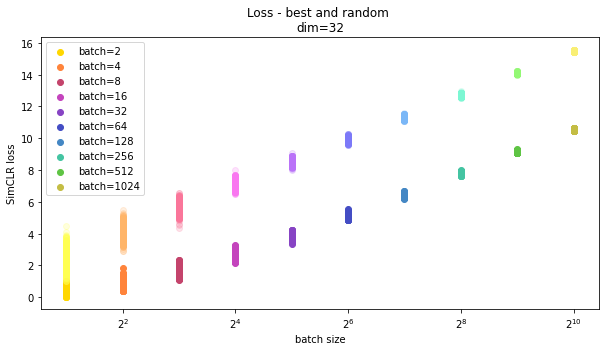

In [44]:
plt.figure(figsize=(10, 5))
dim = 32
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        loss.append(dum([a, a], None).numpy())
    plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'batch={b}')
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        z = torch.rand(size=(b,dim))
        loss.append(dum([a, z], None).numpy())
    plt.scatter([b]*len(loss), loss, c=random_colors[j], alpha=0.2)
# plt.legend(loc=(1.02,0.13)) 
plt.legend()
plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("batch size")
plt.title("Loss - best and random \ndim=%d"%dim)
# plt.savefig("./training_figures/ref_rand_by_batch")
plt.show()


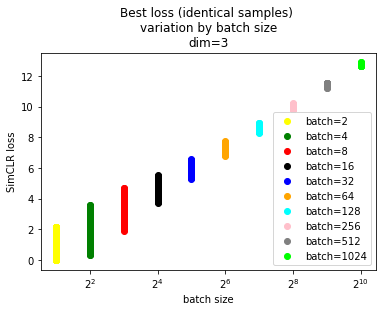

In [6]:
colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua', 'pink', 'grey', 'lime']
# colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua']
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
# for j, b in enumerate([2,4,8,16,32,64]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,3))
        loss.append(dum([a, a], None).numpy())
    plt.scatter([b]*len(loss), loss, c=colors[j], label=f'batch={b}')
plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("batch size")
# plt.legend(loc=(1.02,0.13))
plt.legend()
plt.title("Best loss (identical samples) \nvariation by batch size\ndim=3")
# plt.savefig("./training_figures/ref_best_by_batch")
plt.show()

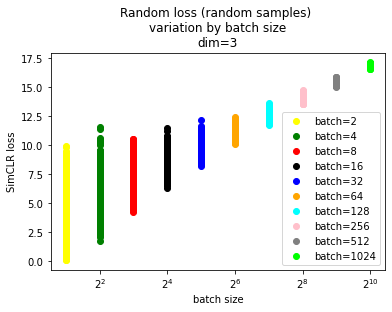

In [7]:
# colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua']
colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua', 'pink', 'grey', 'lime']

# for j, b in enumerate([2,4,8,16,32,64]):
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,3))
        z = torch.rand(size=(b,3))
        loss.append(dum([a, z], None).numpy())
    plt.scatter([b]*len(loss), loss, c=colors[j], label=f'batch={b}')
# plt.legend(loc=(1.02,0.13)) 
plt.legend()
plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("batch size")
plt.title("Random loss (random samples) \nvariation by batch size\ndim=3")
# plt.savefig("./training_figures/ref_rand_by_batch")
plt.show()

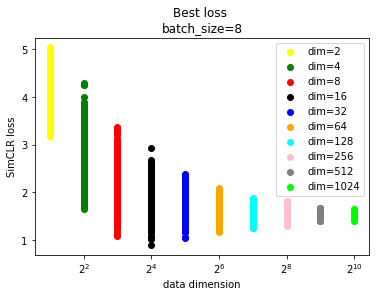

In [8]:
# colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua']
colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua', 'pink', 'grey', 'lime']

# for j, b in enumerate([2,4,8,16,32,64]):
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        loss.append(dum([a, a], None).numpy())
    plt.scatter([b]*len(loss), loss, c=colors[j], label=f'dim={b}')
plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("data dimension")
# plt.legend(loc=(1.02,0.13))
plt.legend()
plt.title("Best loss \nbatch_size=8")
# plt.savefig("./training_figures/ref_best_by_dim_batch8")
plt.show()

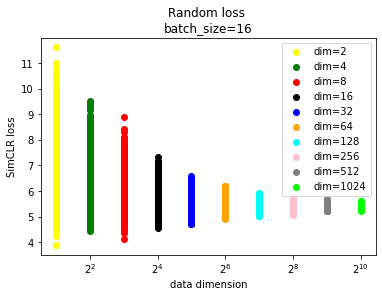

In [9]:
# colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua']
colors = ['yellow', 'green', 'red', 'black', 'blue', 'orange', 'aqua', 'pink', 'grey', 'lime']

# for j, b in enumerate([2,4,8,16,32,64]):
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        z = torch.rand(size=(8,b))
        loss.append(dum([a, z], None).numpy())
    plt.scatter([b]*len(loss), loss, c=colors[j], label=f'dim={b}')
plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("data dimension")
# plt.legend(loc=(1.02,0.13))
plt.legend()
plt.title("Random loss \nbatch_size=16")
# plt.savefig("./training_figures/ref_rand_by_dim_batch8")
plt.show()

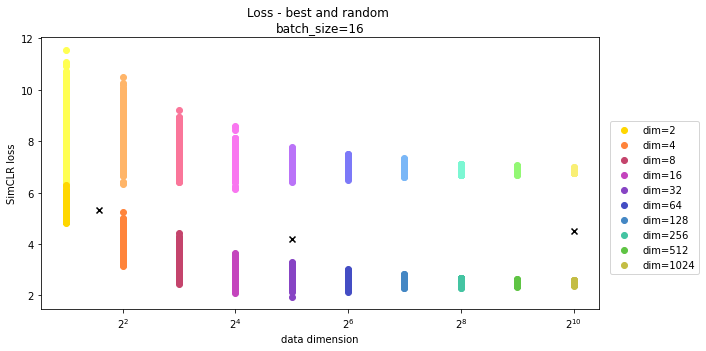

In [23]:
batch_size = 16
plt.figure(figsize=(10, 5))
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(batch_size,b))
        z = torch.rand(size=(batch_size,b))
        loss.append(dum([a, z], None).numpy())
    plt.scatter([b]*len(loss), loss, c=random_colors[j])
    
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(batch_size,b))
        loss.append(dum([a, a], None).numpy())
    plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}')

plt.scatter([3], [5.311], c='black', marker='x')
plt.scatter([32], [4.202], c='black', marker='x')
plt.scatter([1024], [4.523], c='black', marker='x')

plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("data dimension")
plt.legend(loc=(1.02,0.13))
# plt.legend()
plt.title("Loss FCN_3D_1 - best and random \nbatch_size=%d"%batch_size)
# plt.savefig("./training_figures/ref_rand_by_dim_batch8")
plt.show()

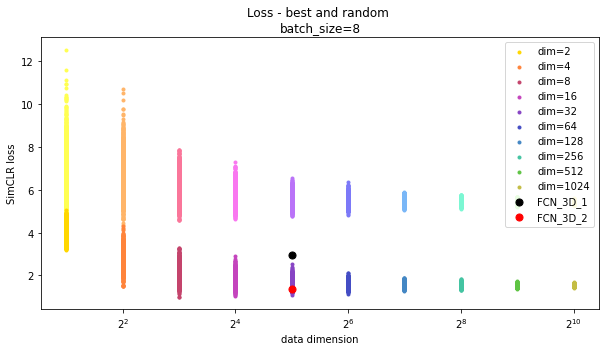

In [41]:

plt.figure(figsize=(10, 5))
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        z = torch.rand(size=(8,b))
        loss.append(dum([a, z], None).numpy())
    plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    
for j, b in enumerate([2,4,8,16,32,64, 128, 256, 512, 1024]):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        loss.append(dum([a, a], None).numpy())
    plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')

plt.scatter([32], [2.961], c='black', marker='o', s=50, label='FCN_3D_1')
plt.scatter([32], [1.360], c='red', marker='o', s=50, label='FCN_3D_2')


plt.xscale('log', base=2)
plt.ylabel("SimCLR loss")
plt.xlabel("data dimension")
# plt.legend(loc=(1.02,0.13))
plt.legend()
plt.title("Loss - best and random \nbatch_size=8")
# plt.savefig("./training_figures/ref_rand_by_dim_batch8")
plt.show()

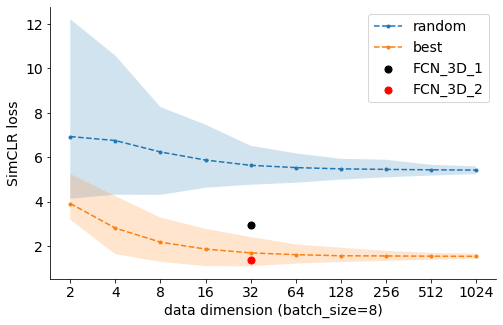

In [20]:
variation = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(8, 5))
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        z = torch.rand(size=(8,b))
        loss.append(dum([a, z], None).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(8,b))
        loss.append(dum([a, a], None).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.scatter([32], [2.961], c='black', marker='o', s=50, label='FCN_3D_1')
plt.scatter([32], [1.360], c='red', marker='o', s=50, label='FCN_3D_2')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("SimCLR loss", fontsize=14)
plt.xlabel("data dimension (batch_size=8)", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=14)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/choose_architecture")
plt.show()

In [71]:
a = [1, 2, 3]

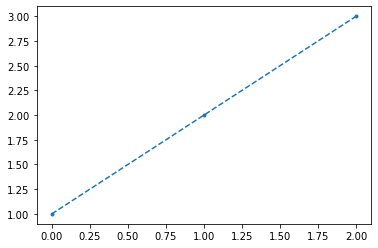

In [77]:
plt.plot(a, linestyle='--', marker='.')
plt.show()

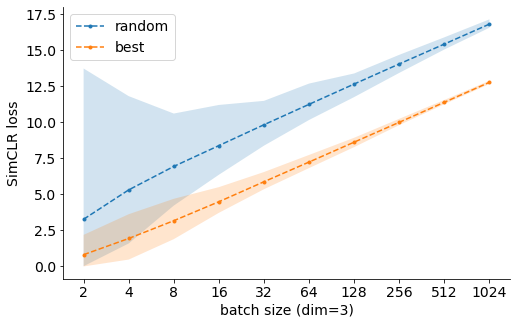

In [21]:
variation = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

dim = 3

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(8, 5))

for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        z = torch.rand(size=(b,dim))
        loss.append(dum([a, z], None).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        loss.append(dum([a, a], None).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("SimCLR loss", fontsize=14)
plt.xlabel("batch size (dim=3)", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=14)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/batch_variation_dim3")
plt.show()

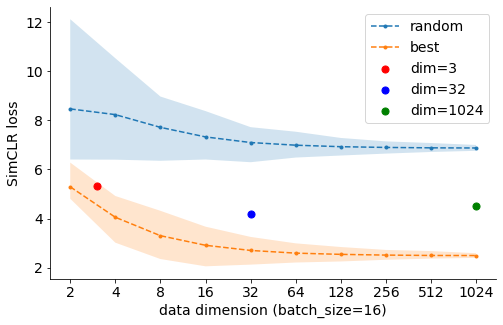

In [19]:

batch_size = 16

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(8, 5))
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(batch_size,b))
        z = torch.rand(size=(batch_size,b))
        loss.append(dum([a, z], None).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(batch_size,b))
        loss.append(dum([a, a], None).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.scatter([3], [5.311], c='red', marker='o', s=50, label='dim=3')
plt.scatter([32], [4.202], c='blue', marker='o', s=50, label='dim=32')
plt.scatter([1024], [4.523], c='green', marker='o', s=50, label='dim=1024')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("SimCLR loss", fontsize=14)
plt.xlabel("data dimension (batch_size=%d)"%batch_size, fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=14)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/choose_dim")
plt.show()


## yAware

In [16]:

from sklearn.metrics.pairwise import rbf_kernel

def dum_y(outputs, labels):
        sigma = 1
        kernel = lambda y1, y2: rbf_kernel(y1, y2, gamma=1./(2*sigma**2))
        temperature = 0.1
        infi = 1e8
        z_i = outputs[0]
        z_j = outputs[1]
        N = len(z_i)
        z_i = F.normalize(z_i, p=2, dim=-1) # dim [N, D]
        z_j = F.normalize(z_j, p=2, dim=-1) # dim [N, D]
        sim_zii= (z_i @ z_i.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
        sim_zjj = (z_j @ z_j.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
        sim_zij = (z_i @ z_j.T) / temperature # dim [N, N] => the diag contains the correct pairs (i,j) (x transforms via T_i and T_j)
        # 'Remove' the diag terms by penalizing it (exp(-inf) = 0)
        sim_zii = sim_zii - infi * torch.eye(N, device=z_i.device)
        sim_zjj = sim_zjj - infi * torch.eye(N, device=z_i.device)

        all_labels = labels.view(N, -1).repeat(2, 1).detach().cpu().numpy() # [2N, *]
        weights = kernel(all_labels, all_labels) # [2N, 2N]
        weights = weights * (1 - np.eye(2*N)) # puts 0 on the diagonal
        weights /= weights.sum(axis=1)
        # if 'rbf' kernel and sigma->0, we retrieve the classical NTXenLoss (without labels)
        sim_Z = torch.cat([torch.cat([sim_zii, sim_zij], dim=1), torch.cat([sim_zij.T, sim_zjj], dim=1)], dim=0) # [2N, 2N]
        log_sim_Z = F.log_softmax(sim_Z, dim=1)

        loss = -1./N * (torch.from_numpy(weights).to(z_i.device) * log_sim_Z).sum()

        correct_pairs = torch.arange(N, device=z_i.device).long()

        return loss

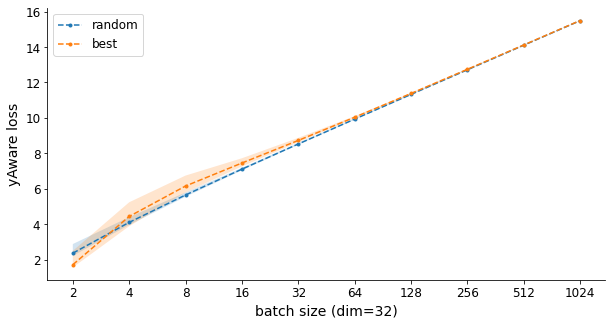

In [13]:
variation = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

dim = 32

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(10, 5))

for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        z = torch.rand(size=(b,dim))
        labels = torch.rand(size=(1, b))
        loss.append(dum_y([a, z], labels).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        loss.append(dum_y([a, a], labels).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("yAware loss", fontsize=14)
plt.xlabel("batch size (dim=32)", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=12)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/yAware_batch_variation_dim32")
plt.show()

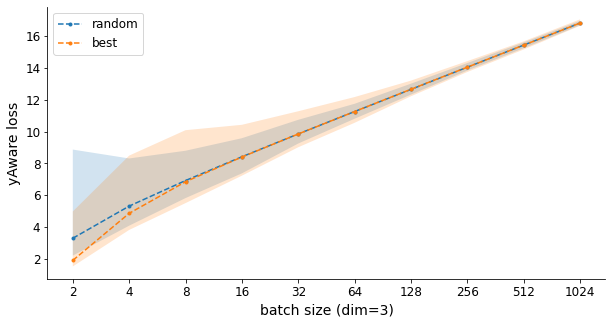

In [15]:
variation = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

dim = 3

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(10, 5))

for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        z = torch.rand(size=(b,dim))
        labels = torch.rand(size=(1, b))
        loss.append(dum_y([a, z], labels).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        loss.append(dum_y([a, a], labels).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("yAware loss", fontsize=14)
plt.xlabel("batch size (dim=3)", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=12)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/yAware_batch_variation_dim3")
plt.show()

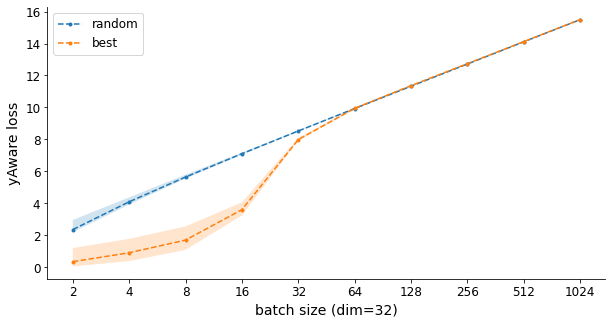

In [17]:
variation = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

dim = 32

min_loss = []
max_loss = []
mean_loss=[]

plt.figure(figsize=(10, 5))

for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        z = torch.rand(size=(b,dim))
        labels = torch.rand(size=(1, b))
        loss.append(dum_y([a, z], labels).numpy())
    # plt.scatter([b]*len(loss), loss, c=random_colors[j], marker='.')
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='random')

min_loss = []
max_loss = []
mean_loss=[]
for j, b in enumerate(variation):
    loss = []
    for i in range(1000):
        a = torch.rand(size=(b,dim))
        loss.append(dum_y([a, a], labels).numpy())
    min_loss.append(min(loss))
    max_loss.append(max(loss))
    mean_loss.append(sum(loss) / len(loss))
    # plt.scatter([b]*len(loss), loss, c=best_colors[j], label=f'dim={b}', marker='.')
    
plt.fill_between(variation, min_loss, max_loss, alpha=0.2)
plt.plot(variation, mean_loss, linestyle='--', marker='.', label='best')

plt.xscale('log', base=2)
plt.xticks(ticks=variation, labels=variation, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("yAware loss", fontsize=14)
plt.xlabel("batch size (dim=32)", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=(1.02,0.13))
plt.legend(fontsize=12)
# plt.title("Loss - best and random \nbatch_size=8", fontsize=16)

plt.savefig("./training_figures/yAware_batch_variation_dim32_sigma=1")
plt.show()